In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

### Read Data

In [2]:
log_dir = "runs1/size_10/"
runs = [d for d in os.listdir(log_dir)]

avg_rewards = []
std_rewards = []
completion_rate = []
for run in runs:
    path = os.path.join(log_dir, run)

    with open(os.path.join(path, "A2C", "metrics.json"), 'r') as f:
        a2c_metrics = json.load(f)
    with open(os.path.join(path, "DQN", "metrics.json"), 'r') as f:
        dqn_metrics = json.load(f)
    with open(os.path.join(path, "REINFORCE", "metrics.json"), 'r') as f:
        reinforce_metrics = json.load(f)
    
    avg_rewards.append([a2c_metrics['last_100_avg_reward'], dqn_metrics['last_100_avg_reward'], reinforce_metrics['last_100_avg_reward']])
    std_rewards.append([a2c_metrics['last_100_std_reward'], dqn_metrics['last_100_std_reward'], reinforce_metrics['last_100_std_reward']])
    completion_rate.append([a2c_metrics['episode_completion_rate'], dqn_metrics['episode_completion_rate'], reinforce_metrics['episode_completion_rate']])

avg_rewards = np.array(avg_rewards)
std_rewards = np.array(std_rewards)
completion_rate = np.array(completion_rate)

print(avg_rewards.shape)
print(std_rewards.shape)
print(completion_rate.shape)


(27, 3)
(27, 3)
(27, 3)


### Average Reward Statistics

In [3]:
print('Average Rewards:')
print('\tA2C: {:.2f}'.format(np.mean(avg_rewards[:,0])))
print('\tDQN: {:.2f}'.format(np.mean(avg_rewards[:,1])))
print('\tREINFORCE: {:.2f}'.format(np.mean(avg_rewards[:,2])))

print('Average Standard Deviation of Rewards:')
print('\tA2C: {:.2f}'.format(np.mean(std_rewards[:,0])))
print('\tDQN: {:.2f}'.format(np.mean(std_rewards[:,1])))
print('\tREINFORCE: {:.2f}'.format(np.mean(std_rewards[:,2])))

print('Average Completion Rate:')
print('\tA2C: {:.2f}%'.format(100 * np.mean(completion_rate[:,0])))
print('\tDQN: {:.2f}%'.format(100 * np.mean(completion_rate[:,1])))
print('\tREINFORCE: {:.2f}%'.format(100 * np.mean(completion_rate[:,2])))

Average Rewards:
	A2C: -167.04
	DQN: -19.50
	REINFORCE: -98.66
Average Standard Deviation of Rewards:
	A2C: 17.36
	DQN: 28.45
	REINFORCE: 16.60
Average Completion Rate:
	A2C: 0.01%
	DQN: 21.70%
	REINFORCE: 2.86%


### Sample Training Plots

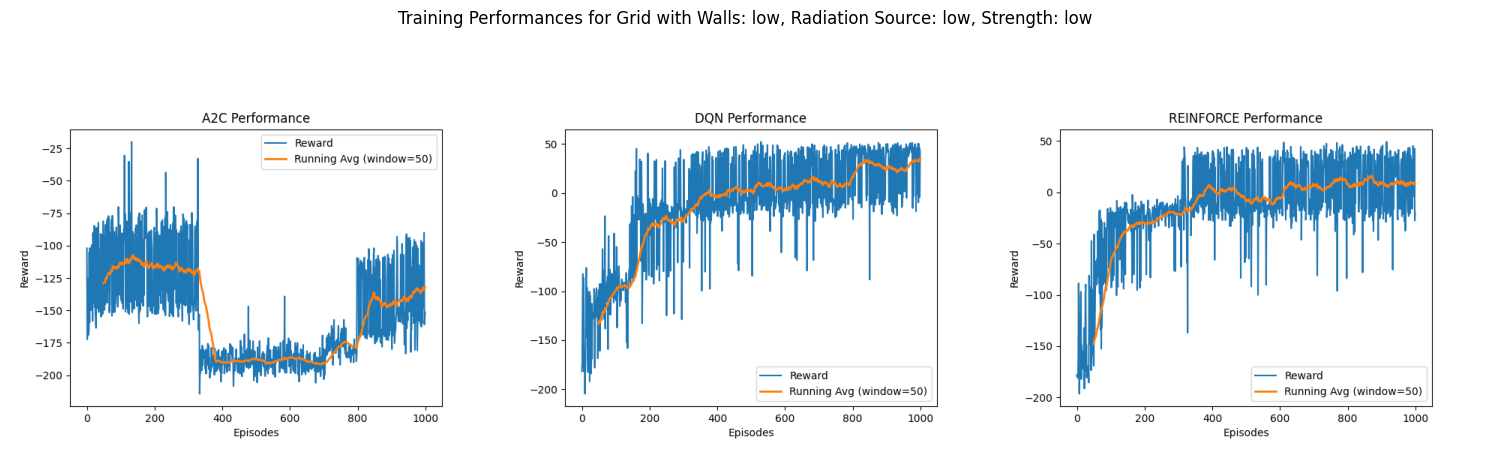

In [6]:
walls = 'low'
rad_source = 'low'
rad_strength = 'low'

run = f'grid_w-{walls}_r-{rad_source}_s-{rad_strength}'
path = os.path.join(log_dir, run)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i, algo in enumerate(['A2C', 'DQN', 'REINFORCE']):
    img = mpimg.imread(os.path.join(path, algo, "training_plot.png"))
    
    axs[i].imshow(img)
    axs[i].axis('off')
fig.suptitle(f'Training Performances for Grid with Walls: {walls}, Radiation Source: {rad_source}, Strength: {rad_strength}')
plt.tight_layout()